<a href="https://colab.research.google.com/github/yuriborg/scikit_learn_beginner_tutorial/blob/main/machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About the creator

Hi, my name is Yuri Borges, I'm a Physics Bachelor student at USP (University of São Paulo) and I work with Data Science/Data Analysis for almost 3.5 years from now.

I created these tutorials a year and a half ago to help me revisit my knowledge, and I will soon be formatting properly to turn this into a complete tutorial for beginners. I hope you enjoy it, and good studying!


- Follow me on linkedin: https://www.linkedin.com/in/yuri-borges-b7b76b169/
- Follow me on github: https://github.com/yuriborg



## Overview

### Basic SciKit-Learn examples

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


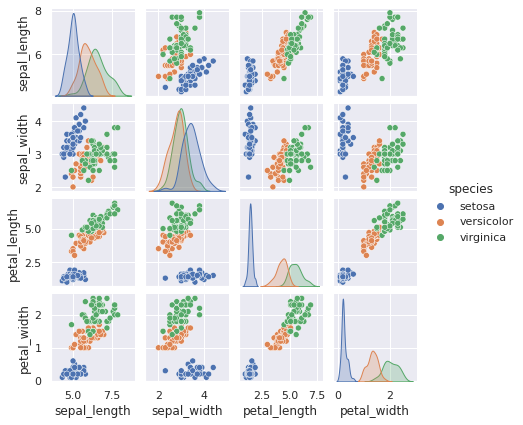

In [ ]:
import seaborn as sns; sns.set()

iris = sns.load_dataset('iris')
sns.pairplot(iris, hue='species', size=1.5);

In [ ]:
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']
X_iris, y_iris

(     sepal_length  sepal_width  petal_length  petal_width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [150 rows x 4 columns], 0         setosa
 1         setosa
 2         setosa
 3         setosa
 4         setosa
          ...    
 145    virginica
 146    virginica
 147    virginica
 148    virginica
 149    virginica
 Name: species, Length: 150, dtype: object)

In [ ]:
# Feature Matrix(X)   lenght, dimensions:   n_samples(number of rows), n_features(number of columns), 2
# Target Vector (y)   lenght:               n_samples(number of rows)

## Basics of the SciKit-Learn API

Most commonly, the steps in using the Scikit-Learn estimator API are as follows (we
will step through a handful of detailed examples in the sections that follow):

1. Choose a class of model by importing the appropriate estimator class from Scikit-
Learn.

2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector following the discussion
from before.
4. Fit the model to your data by calling the fit() method of the model instance.
5. Apply the model to new data:
• For supervised learning, often we predict labels for unknown data using the
predict() method.
• For unsupervised learning, we often transform or infer properties of the data
using the transform() or predict() method.

## Supervised Learning example: Simple Linear Regression

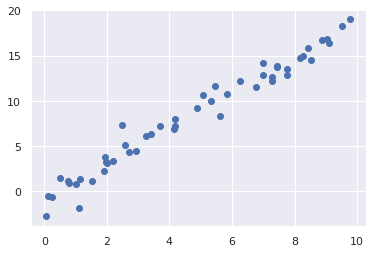

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(666)
x = 10 * rng.rand(50)             #normal distribution
y = 2 * x -1 + rng.randn(50)   #standard normal distribution
plt.scatter(x, y);

## Step 1. Choose a class of model

In [ ]:
from sklearn.linear_model import LinearRegression

## Step 2. Choose model hyperparameters



    • Would we like to fit for the offset (i.e., intercept)?
    • Would we like the model to be normalized?
    • Would we like to preprocess our features to add model flexibility?
    • What degree of regularization would we like to use in our model?
    • How many model components would we like to use?

These questions are represented by hyperparameters

In [ ]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

## Step 3. Arrange data into a features matrix and target vector.

In [ ]:
#The features Matrix(x) should have ate least 2 dimensions

X = x[:, np.newaxis]
X.shape

(50, 1)

## Step 4. Fit the model to our data

In [ ]:
model.fit(X, y)

LinearRegression()

In [ ]:
#All models have some methods in a trailing underscore
#This specific model has:

#coef = slope
#intercept = intercept

model.coef_ , model.intercept_

(array([1.94388568]), -0.7785468853912274)

## Step 5. Predict labels for unknow data





In [ ]:
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

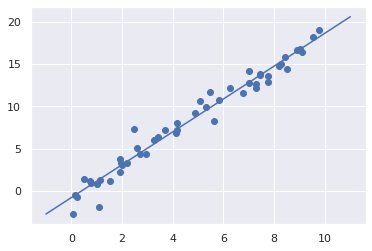

In [ ]:
plt.scatter(x, y)
plt.plot(Xfit, yfit)

# Supervised learning example: Iris classification

## Gaussian Naive Bayes


  It proceeds by assuming each class is drawn from an axis-aligned
  Gaussian distribution Because it is so fast and has no hyperparameters to choose, Gaussian Naive Bayes is often a good model to use as a baseline classification, before explore whether improvements can be found through more sophisticated models.

### Train set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)


In [ ]:
from sklearn.naive_bayes import GaussianNB #1. choose model class
model = GaussianNB()      #2. Instantiate the model with hyperparameters(if it have)
model.fit(Xtrain, ytrain) #3. Fit the model to data
ymodel = model.predict(Xtest) #4. Predict on new data

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ymodel)

0.9736842105263158

# Unsupervised learning example: Iris dimensionality


Reducing the dimensionality of the Iris data so as to more easily visualize it. Recall that the Iris data is four dimensional: there are four features recorded for each sample. Let's use PCA(Principal Component Analysis).

This can be useful to a previous graph data analysis, before you choose the approach to be used

In [ ]:
from sklearn.decomposition import PCA  #1. Choose the model class
model = PCA(n_components=2)   #2. Instantiate the model with hyperparamters(if it have)
model.fit(X_iris)  #3. Fit the model to data (in this case, the y is not specified, sincce is dimentionality reduction)
X_2D = model.transform(X_iris) #4. Transform the data to two dimensions

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


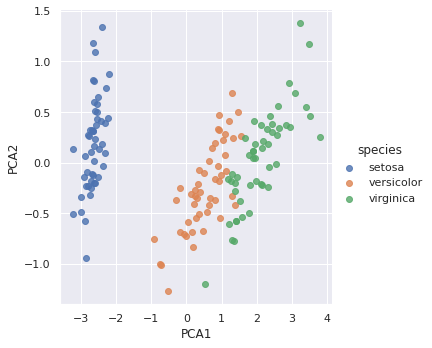

In [ ]:
#Plotting the results

iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

We see that in the two-dimensional representation, the species are fairly well separated, even though the PCA algorithm had no knowledge of the species labels! This indicates that a relatively straightforward classification will probably be effective
on the dataset.

# Unsupervised learning: Iris clustering


Lets use the Gaussian Mixture Model (GMM)

In [ ]:
from sklearn.mixture import GaussianMixture as GMM  #1. Choose the model
model = GMM(n_components=3, covariance_type='full') #2. Instantiate the model with hyperparameters(if it have)
model.fit(X_iris) #3. Fit the model to data (y is not specified, since is clustering)
y_gmm = model.predict(X_iris)

In [ ]:
y_gmm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


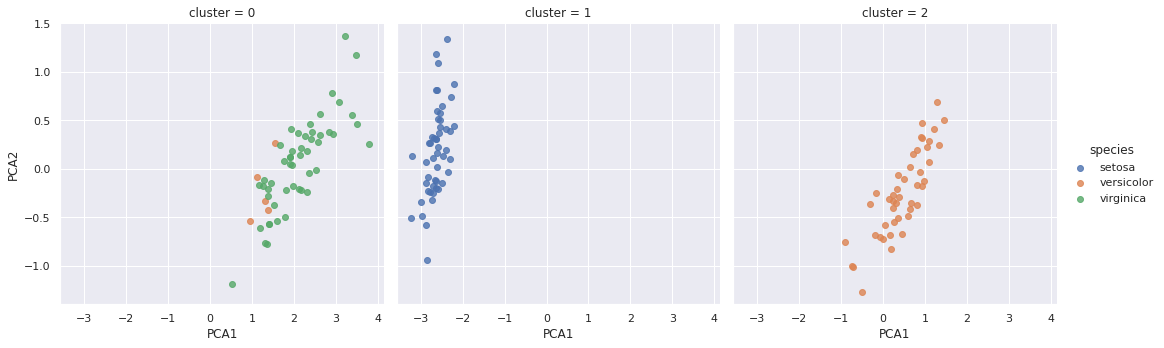

In [ ]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species', col='cluster',
           fit_reg=False);


# Application: Identifying Handwritten Digits

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

It's a threee dimensional-array, consisting of 1,797 samples, each of these consisting of 8x8 grid of pixels

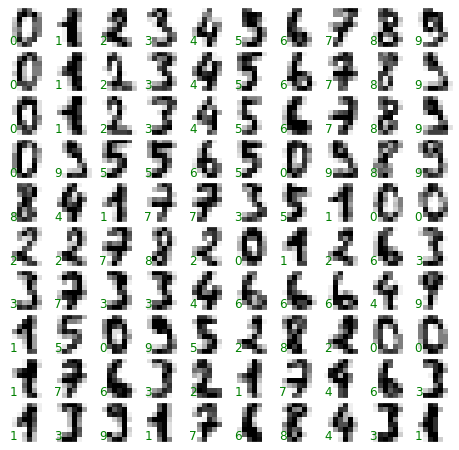

In [ ]:
import matplotlib.pyplot as plt

fig, axes  = plt.subplots(10, 10, figsize=(8,8),
                          subplot_kw={'xticks':[], 'yticks':[]},
                          gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i,ax in enumerate(axes.flat):
  ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
  ax.text(0.05, 0.05, str(digits.target[i]),
          transform=ax.transAxes, color='green')

In [ ]:
X = digits.data
y = digits.target

X.shape, y.shape

((1797, 64), (1797,))

## Dimensionality Reduction to visualize the data


Isomap --> manifold learning algorithm

In [ ]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_isomap.py:304: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.8/dist-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

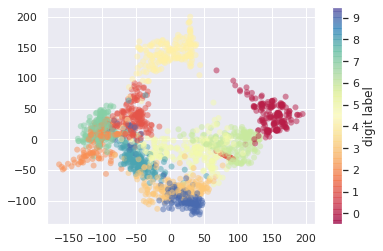

In [ ]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5, cmap=plt.cm.Spectral)

plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)

We can seee that the data is very well separated, so, we can use a classification model to this problem

## Classification on Digits

In [ ]:
X = digits.data
y = digits.target

X.shape, y.shape

((1797, 64), (1797,))

In [ ]:
from sklearn.naive_bayes import GaussianNB

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)
Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape

((1347, 64), (1347,), (450, 64), (450,))

In [ ]:
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_predict = model.predict(Xtest)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_predict)

0.8333333333333334

In [ ]:
#The accuracy is low, so, we can analyze better with a confusion matrix

Text(80.90000000000006, 0.5, 'true value')

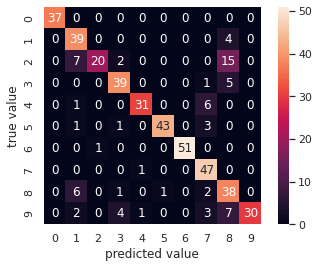

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_predict)
sns.heatmap(mat, square=True, annot=True, cbar=True)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [ ]:
#A large number os 2s are misclassified as 9s and 8s, for example


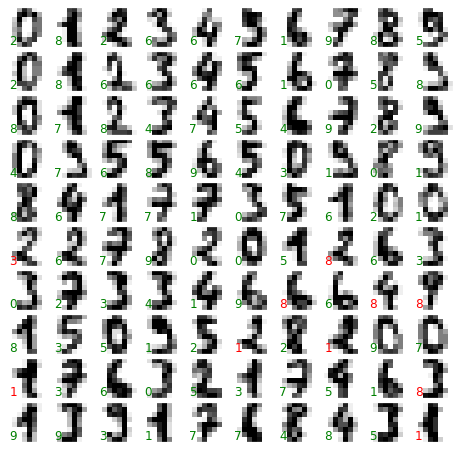

In [ ]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                          subplot_kw={'xticks':[], 'yticks':[]},
                          gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
  ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
  ax.text(0.05, 0.05, str(y_predict[i]),
  transform=ax.transAxes,
                color='green' if (ytest[i] == y_predict[i]) else 'red')

# Model Validation

## The wrong way: Using k-nn

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

model.fit(X, y)
y_model = model.predict(X)

from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

Error: it trains and predicts on the same data

## The right way (holdout/test set)

In [ ]:
from sklearn.model_selection import train_test_split

# split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                        train_size=0.5)

# fit the model on one set of data
model.fit(X1, y1)


# evaluate the model on the second set of data
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.9066666666666666

## Cross Validation

In [ ]:
#Two fold cross validation by hand

y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.96, 0.9066666666666666)

In [ ]:
#5 fold crosss validation

from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [ ]:
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut())
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

# The bias-variance tradeoff



    • For high-bias models, the performance of the model on the validation set is similar to the performance on the training set. (Underfitting)
    • For high-variance models, the performance of the model on the validation set is far worse than the performance on the training set.(Overfitting)

In [ ]:
#R2 score = coefficient of determination
#It measures how well a model performs relative to a simple mean of the target values.

# R2 = 1 indicates a perfect match
# R2 = 0 indicates the model does no better than simply taking themean of the data

In [ ]:
#Validation Curves


# • The training score is everywhere higher than the validation score. This is gener‐
# ally the case: the model will be a better fit to data it has seen than to data it has
# not seen.
# • For very low model complexity (a high-bias model), the training data is underfit,
# which means that the model is a poor predictor both for the training data and for
# any previously unseen data.
# • For very high model complexity (a high-variance model), the training data is
# overfit, which means that the model predicts the training data very well, but fails
# for any previously unseen data.
# • For some intermediate value, the validation curve has a maximum. This level of
# complexity indicates a suitable trade-off between bias and variance.

# Learning Curves


    • A model of a given complexity will overfit a small dataset: this means the training score will be relatively high, while the validation score will be relatively low.
    • A model of a given complexity will underfit a large dataset: this means that the training score will decrease, but the validation score will increase.
    • A model will never, except by chance, give a better score to the validation set thanthe training set: this means the curves(score curve and validation curve) should keep getting closer together but never cross.

In [ ]:
from sklearn.model_selection import learning_curve

In [ ]:
# from sklearn.learning_curve import learning_curve
# fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
# for i, degree in enumerate([2, 9]):
  # N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
  # X, y, cv=7,
  # train_sizes=np.linspace(0.3, 1, 25))
  # ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
  # ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
  # ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color='gray',
  # linestyle='dashed')
  #ax[i].set_ylim(0, 1)
  # ax[i].set_xlim(N[0], N[-1])
  # ax[i].set_xlabel('training size')
  # ax[i].set_ylabel('score')
  # ax[i].set_title('degree = {0}'.format(degree), size=14)
  # ax[i].legend(loc='best')

# Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# from sklearn.grid_search import GridSearchCV
# param_grid = {'polynomialfeatures__degree': np.arange(21),
                # 'linearregression__fit_intercept': [True, False],
                # 'linearregression__normalize': [True, False]}
# grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [ ]:
# grid.fit(X, y);

In [ ]:
# grid.best_params_

In [ ]:
# model = grid.best_estimator_
# plt.scatter(X.ravel(), y)
# lim = plt.axis()
# y_test = model.fit(X, y).predict(X_test)
# plt.plot(X_test.ravel(), y_test, hold=True);
# plt.axis(lim);

# Feature Engineering

## Categorical Features

In [ ]:
data = [
{'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
{'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
{'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
{'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]
data

[{'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
 {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
 {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
 {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}]

In [ ]:
# When the data comes as a list of dictionaries, we use Scikit-Learn’s DictVector

from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)


array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

In [ ]:
vec.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

In [ ]:
#If the data is large, encoding can turn it in a very heavy and low dataset
#If it contains many 0s, to safety reduce the number of data, use sparse

vec = DictVectorizer(sparse=True, dtype=int)
vec.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

## Text Features


The simplest method to treating it is with word counts (vectorization method)

In [ ]:
sample = ['problem of evil',
          'evil queen',
          'horizon problem'
          ]
sample

['problem of evil', 'evil queen', 'horizon problem']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [ ]:
import pandas as pd
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


In [ ]:
# There are some issues with this approach, however: the raw word counts lead to fea‐
# tures that put too much weight on words that appear very frequently, and this can be
# suboptimal in some classification algorithms. One approach to fix this is known as
# term frequency–inverse document frequency (TF–IDF), which weights the word counts
# by a measure of how often they appear in the documents.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


## Image Features


    The simplest wayy is to use its pixels, like in the example above

## Derived Features

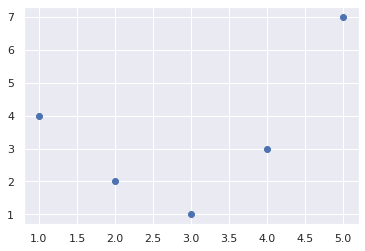

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y);

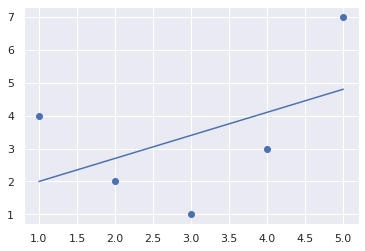

In [ ]:
from sklearn.linear_model import LinearRegression
X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x, y)
plt.plot(x, yfit);

It’s clear that we need a more sophisticated model to describe the relationship
between x and y. We can do this by transforming the data, adding extra columns of features to drive more flexibility in the model. For example, we can add polynomial features to the data this way:

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)
print(X2)

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


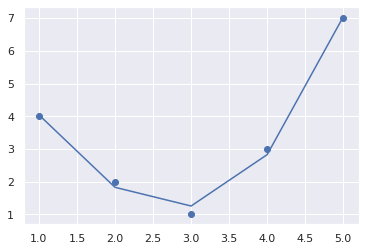

In [ ]:
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit);

## Imputation Missing Data


Simple strategy: replacing missing values
with the mean of the column

Sophisticated strategy: using matrix completion or a
robust model to handle such data

In [ ]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='mean')
X2 = imp.fit_transform(X)
X2

array([[1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [ ]:
model = LinearRegression().fit(X2, y)
model.predict(X2)

array([2. , 2.7, 3.4, 4.1, 4.8])

## Pipelines





In [ ]:
from sklearn.pipeline import make_pipeline
model = make_pipeline(SimpleImputer(strategy='mean'),
                      PolynomialFeatures(degree=2),
                      LinearRegression())
model

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [ ]:
model.fit(X, y) # X with missing values, from above
print(y)
print(model.predict(X))

[4 2 1 3 7]
[4.14285714 1.62857143 1.25714286 3.02857143 6.94285714]


# Naive Bayes Classification



Naive Bayes models are a group of extremely fast and simple classification algorithms
that are often suitable for very high-dimensional datasets. Because they are so fast and have so few tunable parameters, they end up being very useful as a quick-and-
dirty baseline for a classification problem.

Naive Bayes classifiers are built on Bayesian classification methods. These rely on Bayes’s theorem, which is an equation describing the relationship of conditional probabilities of statistical quantities. In Bayesian classification, we’re interested in finding the probability of a label given some observed features, which we can write as

\[ P(L |_features_) \]

Bayes’s theorem tells us how to express this in terms of quantities we can compute more directly:


\[ P (L |_features_) = \[\frac{P (_features_ | L) P}{P(_features_)} \] \]\

If we are trying to decide between two labels—let’s call them L1 and L2 —then one way to make this decision is to compute the ratio of the posterior probabilities for each label:



All we need now is some model by which we can compute P features Li for each
label. Such a model is called a generative model because it specifies the hypothetical random process that generates the
data. Specifying this generative model for each
label is the main piece of the training of such a Bayesian
classifier. The general ver‐
sion of such a training step is a very difficult task, but
we can make it simpler through
the use of some simplifying assumptions about the form of
this model.

This is where the “naive” in “naive Bayes” comes in: if we make very naive assumptions about the generative model for each label, we can find a rough approximation of
the generative model for each class, and then proceed with
the Bayesian classification.
Different types of naive Bayes classifiers rest on different naive assumptions about the
data, and we will examine

## Gaussian naive Bayes

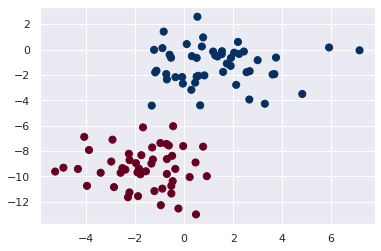

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

One extremely fast way to create a simple model is to assume that the data is described by a Gaussian distribution with no covariance between dimensions.

We can fit this model by simply finding the mean and standard deviation of the points within each label, which is all you need to define such a distribution.

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

In [ ]:
#Now, let’s generate some new data and predict the label:

rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

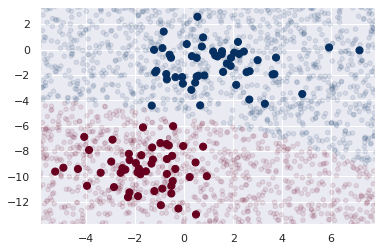

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

In [ ]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

In [ ]:
yprob

array([[9.25897220e-08, 9.99999907e-01],
       [8.05934584e-04, 9.99194065e-01],
       [5.95247683e-05, 9.99940475e-01],
       ...,
       [9.99994010e-01, 5.99039932e-06],
       [1.01364165e-09, 9.99999999e-01],
       [1.53083494e-01, 8.46916506e-01]])

##Multinomial Naive Bayes

The Gaussian assumption just described is by no means the only simple assumption
that could be used to specify the generative distribution for each label. Another useful
example is multinomial naive Bayes, where the features are assumed to be generated
from a simple multinomial distribution. The multinomial distribution describes the
probability of observing counts among a number of categories, and thus multinomial
naive Bayes is most appropriate for features that represent counts or count rates.
The idea is precisely the same as before, except that instead of modeling the data dis‐
tribution with the best-fit Gaussian, we model the data distribution with a best-fit
multinomial distribution.

##Example: Classifying text

In [ ]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space',
              'comp.graphics']

train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [ ]:
train.data[5]

"From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)\nSubject: Federal Hearing\nOriginator: dmcgee@uluhe\nOrganization: School of Ocean and Earth Science and Technology\nDistribution: usa\nLines: 10\n\n\nFact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the\nuse of the bible reading and prayer in public schools 15 years ago is now\ngoing to appear before the FCC with a petition to stop the reading of the\nGospel on the airways of America.  And she is also campaigning to remove\nChristmas programs, songs, etc from the public schools.  If it is true\nthen mail to Federal Communications Commission 1919 H Street Washington DC\n20054 expressing your opposition to her request.  Reference Petition number\n\n2493.\n"

In [ ]:
data

{'data': ["From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n",
  "From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: University of Washingto

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())


#With this pipeline, we can apply the model to the training data, and predict
#labels for the test data:

model.fit(train.data, train.target)
labels = model.predict(test.data)